# The Magnificent Price Action of the Magnificent 7 Stocks

#### ___Project created by:___ Liam Hudson
***

### Goals and Data Questions

* Which stock saw the highest increase in 2024?

* What year was the best for each stock's growth?

* What year was the worst for each stock's growth?

## Data Preparation
***

### Importing the Dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

file_path = 'Projects/Mag7/mag7.csv'
df = pd.read_csv(file_path)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Projects/Mag7/mag7.csv'

Call `.info()` to see if any columns have Null/missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2515 non-null   object 
 1   AAPL    2515 non-null   float64
 2   AMZN    2515 non-null   float64
 3   GOOGL   2515 non-null   float64
 4   META    2515 non-null   float64
 5   MSFT    2515 non-null   float64
 6   NVDA    2515 non-null   float64
 7   TSLA    2515 non-null   float64
dtypes: float64(7), object(1)
memory usage: 157.3+ KB


All columns have 2,515 non-null values, which is consistent with the total amount of entries.

### Data Inspection/Cleaning 

In [336]:
# Convert 'Date' values to datetime
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce', format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year

# Set index to exclude 'Date' values from rounding
df = df.set_index('Date')

# Round values to 2 decimal places
df = round(df[df.columns], 2)

# Reset index
df = df.reset_index()
df

,Date,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA,Year
0,2014-11-25,29.40,16.75,27.46,75.63,47.47,0.51,16.54,2014
1,2014-11-26,29.75,16.68,27.39,77.62,47.75,0.52,16.56,2014
2,2014-11-28,29.73,16.93,27.45,77.70,47.81,0.52,16.30,2014
3,2014-12-01,28.77,16.30,26.98,75.10,48.62,0.51,15.44,2014
4,2014-12-02,28.66,16.32,26.93,75.46,48.46,0.52,15.43,2014
...,...,...,...,...,...,...,...,...,...
2510,2024-11-15,225.00,202.61,172.49,554.08,415.00,141.98,320.72,2024
2511,2024-11-18,228.02,201.70,175.30,554.40,415.76,140.15,338.74,2024
2512,2024-11-19,228.28,204.61,178.12,561.09,417.79,147.01,346.00,2024
2513,2024-11-20,229.00,202.88,175.98,565.52,415.49,145.89,342.03,2024


In [340]:
# Check if 'Data' retained datetime as its Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2515 non-null   datetime64[ns]
 1   AAPL    2515 non-null   float64       
 2   AMZN    2515 non-null   float64       
 3   GOOGL   2515 non-null   float64       
 4   META    2515 non-null   float64       
 5   MSFT    2515 non-null   float64       
 6   NVDA    2515 non-null   float64       
 7   TSLA    2515 non-null   float64       
 8   Year    2515 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 167.1 KB


Just to have a better understanding of the data, below is a visualization modeling the price action of each stock within the timeframe of this dataset.

In [3]:
fig, ax = plt.subplots(figsize = (12,7))

# Plot each column
for col in stock_cols:
    ax.plot(df['Date'], df[col], label = col)

# Set format for x-axis labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set title and axes labels
ax.set_title('Price Action of Magnificent 7 Stocks from Nov. 2014 to Nov. 2024')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid(True, linestyle = '--', alpha = 0.5)
ax.legend(title = 'Stocks')

plt.show()

NameError: name 'plt' is not defined

## Data Analysis
***

In [356]:
# Create new DataFrame with just 2024 entries
df_2024 = df[df['Year'] == 2024]
df_2024

,Date,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA,Year
2289,2024-01-02,185.64,149.93,138.17,346.29,370.87,48.17,248.42,2024
2290,2024-01-03,184.25,148.47,138.92,344.47,370.60,47.57,238.45,2024
2291,2024-01-04,181.91,144.57,136.39,347.12,367.94,48.00,237.93,2024
2292,2024-01-05,181.18,145.24,135.73,351.95,367.75,49.10,237.49,2024
2293,2024-01-08,185.56,149.10,138.84,358.66,374.69,52.25,240.45,2024
...,...,...,...,...,...,...,...,...,...
2510,2024-11-15,225.00,202.61,172.49,554.08,415.00,141.98,320.72,2024
2511,2024-11-18,228.02,201.70,175.30,554.40,415.76,140.15,338.74,2024
2512,2024-11-19,228.28,204.61,178.12,561.09,417.79,147.01,346.00,2024
2513,2024-11-20,229.00,202.88,175.98,565.52,415.49,145.89,342.03,2024


Here is a similar visualization, but just for the 2024 price action.

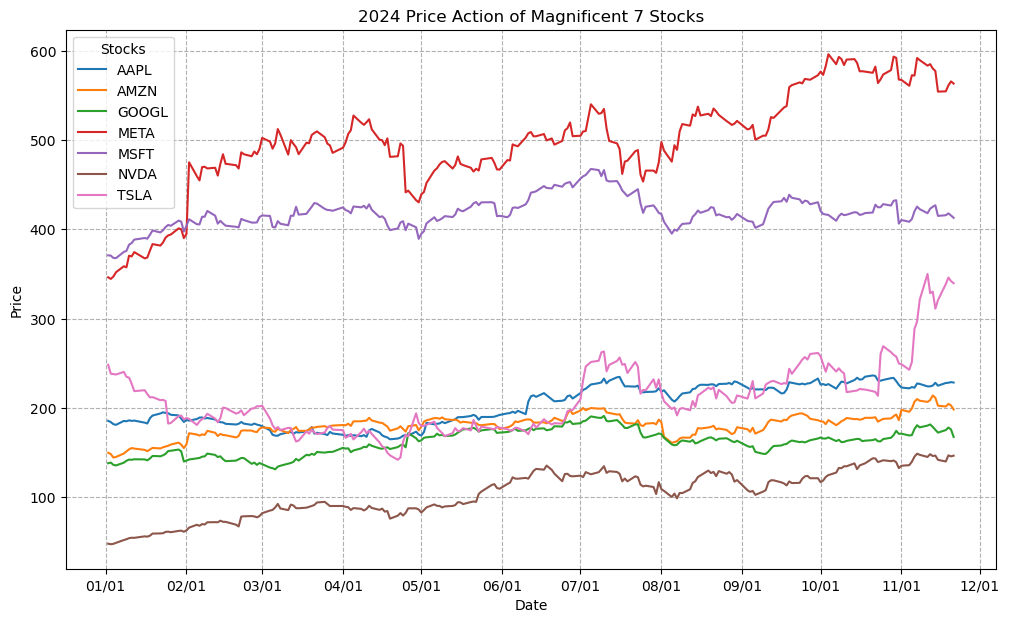

In [348]:
fig, ax = plt.subplots(figsize = (12,7))

# Plot each column
for col in stock_cols:
    ax.plot(df_2024['Date'], df_2024[col], label = col)

# Set date format for x-axis labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Set title and axes labels
ax.set_title('2024 Price Action of Magnificent 7 Stocks')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(title = 'Stocks')
ax.grid(True, linestyle = '--')

plt.show()

It is interesting to see how TSLA's price action is rallying post-election.

Below is the process of finding the growth that each stock has experienced in 2024.

In [237]:
# Create a list of column names
stock_cols = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

# Empty lists to store min and max values
mins = []
maxes = []

# Empty dictionary to store growth of each stock
growth = {}

# Compute stocks' growth
for n in range(0, len(stock_cols) - 1):
    mins.append(df_2024[stock_cols[n]].min())
    maxes.append(df_2024[stock_cols[n]].max())
    growth[stock_cols[n]] = round(maxes[n] - mins[n], 2)

growth

{'AAPL': 71.48,
 'AMZN': 69.53,
 'GOOGL': 59.78,
 'META': 251.47,
 'MSFT': 99.81,
 'NVDA': 101.31}

META has had the highest growth thus far in 2024. The difference between its lowest and highest values is $251.47.

In [215]:
df_2024.loc[df_2024['META'] == mins[3]]

,Date,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA,Year
2290,2024-01-03,184.25,148.47,138.92,344.47,370.6,47.57,238.45,2024


In [217]:
df_2024.loc[df_2024['META'] == maxes[3]]

,Date,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA,Year
2480,2024-10-04,226.8,186.51,167.06,595.94,416.06,124.92,250.08,2024


META made its jump in price in over 9 months. I am going to check all the stocks to see which had the most growth in the least amount of time.

In [239]:
def time_check24(col):
    # Store entries of min and max values for col
    min_row = df_2024.loc[df_2024[col] == df_2024[col].min()]
    max_row = df_2024.loc[df_2024[col] == df_2024[col].max()]

    # Store 'Date' values of corresponding entries
    min_date = min_row['Date'].values[0]
    max_date = max_row['Date'].values[0]

    # Compute and return difference between dates
    return abs(pd.to_datetime(max_date) - pd.to_datetime(min_date))

In [241]:
time_delta = {}
for col in stock_cols:
    time_delta[col] = time_check24(col)

time_delta

{'AAPL': Timedelta('185 days 00:00:00'),
 'AMZN': Timedelta('314 days 00:00:00'),
 'GOOGL': Timedelta('126 days 00:00:00'),
 'META': Timedelta('275 days 00:00:00'),
 'MSFT': Timedelta('182 days 00:00:00'),
 'NVDA': Timedelta('309 days 00:00:00'),
 'TSLA': Timedelta('203 days 00:00:00')}

GOOGL made a price jump of $59.78 from its YTD (year-to-date) low to YTD high in 126 days.

In a contest of strongest price action in shortest time, GOOGL takes the cake. Conversely, META has the strongest overall price action, regardless of timespan.

Using a new custom function `most_growth`, I am going to find the years that each stock had the most growth.

In [254]:
growth_years = {}

for col in stock_cols:
    # Create new dataframe of min and max values of col
    year_diff = df.groupby('Year')[col].agg(['min', 'max'])

    # Compute difference
    year_diff['Difference'] = year_diff['max'] - year_diff['min']

    # Fill dictionary
    growth_years[col] = [year_diff['Difference'].idxmin(), year_diff['Difference'].idxmax()]

growth_years

{'AAPL': [2014, 2020],
 'AMZN': [2014, 2020],
 'GOOGL': [2014, 2022],
 'META': [2014, 2024],
 'MSFT': [2014, 2023],
 'NVDA': [2014, 2024],
 'TSLA': [2014, 2022]}

Clearly, the year with the least amount of growth for each Magnificent 7 stock is 2014. This is when all the equities had the lowest relative value; consequently, the weakest price action.

Interestingly, the years with the highest growth for each stock occurred at the turn of the decade. AAPL and AMZN saw their strongest price action in 2020, which makes sense considering the national lockdown--people were using devices for work/recreation at higher rates, as well as shopping online.

## Conclusions
***

The stock market is a tremendous investment tool with ample opportunity. In 2024, many stocks have [seen unprecedented levels of growth](https://finance.yahoo.com/news/stocks-bonds-rally-federal-cuts-231405705.html), making many analysts curious about just how strong this year-long rally is. In this project, I explored the price action of the Magnificent 7 stocks in the last decade. 

Some key insights and takeaways from this analysis:

* The majority of these stocks' growth occurred at the turn of the decade when technology became more involved in our lives.
* 2024 has been the best year (in the last decade) for both META and NVDA, seeing triple-digit price increases from YTD lows to highs.
    - META increasing over $250.00 YTD
      
    - NVDA increasing over $100.00 YTD  
* Although META has seen the largest jump in overall price in 2024, GOOGL had the shortest timespan (126 days) for its strongest price action (compared to META's 275 days).

For further analytical insight, looking into other factors such as trading volume, liquidity, or interest rates could be useful to determine the "why?" behind the price action.